In [30]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [31]:
df = pd.read_csv('D:/Prog/ML/tasks for education/LogReg/microchip_tests.txt', 
                 header=None, names = ('test1','test2','released'))

In [42]:
X = df.iloc[:,:2].values
y = df.iloc[:,2].values

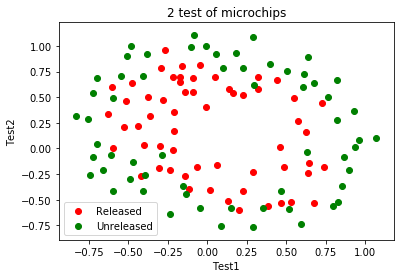

In [45]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Released')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='green', label='Unreleased')
plt.xlabel('Test1')
plt.ylabel('Test2')
plt.title('2 test of microchips')
plt.legend()

In [46]:
def plot_boundary(clf, X, y, grid_step=.01, poly_featurizer=None):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
    np.arange(y_min, y_max, grid_step))

    # каждой точке в сетке [x_min, m_max]x[y_min, y_max]
    # ставим в соответствие свой цвет
    Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    print(Z)

In [53]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)

доля правильных ответов на выборке: 0.627


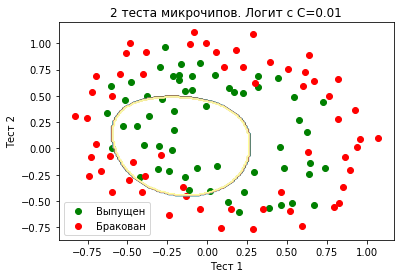

In [55]:
C=1e-2
logit = LogisticRegression(C=C, n_jobs=-1)
logit.fit(X_poly,y)

plot_boundary(logit, X, y, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов. Логит с C=0.01')
plt.legend();

print('доля правильных ответов на выборке:', round(logit.score(X_poly, y), 3))

доля правильных ответов на выборке: 0.831


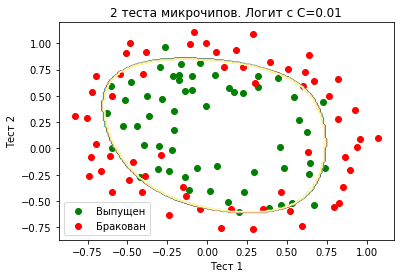

In [56]:
C=1
logit = LogisticRegression(C=C, n_jobs=-1)
logit.fit(X_poly,y)

plot_boundary(logit, X, y, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов. Логит с C=0.01')
plt.legend();

print('доля правильных ответов на выборке:', round(logit.score(X_poly, y), 3))

доля правильных ответов на выборке: 0.873


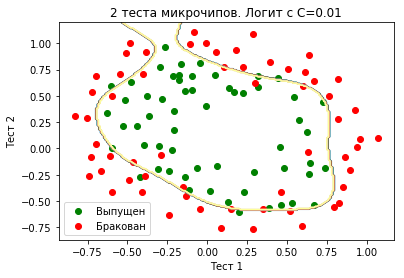

In [59]:
C=10000
logit = LogisticRegression(C=C, n_jobs=-1)
logit.fit(X_poly,y)

plot_boundary(logit, X, y, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов. Логит с C=0.01')
plt.legend();

print('доля правильных ответов на выборке:', round(logit.score(X_poly, y), 3))

In [60]:
skf = StratifiedKFold(n_splits=5, shuffle=True)
c_values = np.logspace(-2, 3, 500)
logit_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, verbose=True, n_jobs=-1)
logit_searcher.fit(X_poly, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   47.7s finished


LogisticRegressionCV(Cs=array([1.00000e-02, 1.02334e-02, ..., 9.77192e+02, 1.00000e+03]),
           class_weight=None,
           cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=True)

In [63]:
logit_searcher.C_

array([33.65534976])

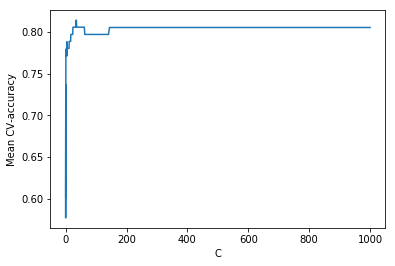

In [64]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy');

(0, 40)

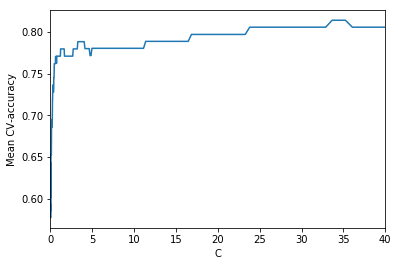

In [66]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy');
plt.xlim((0,40))